These are some early bandit tests. One thing that's apparent is that I need to vary the rewards in the environment, or else I think I am getting biased results.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import bandit
import importlib
importlib.reload(bandit)

<module 'bandit' from '/opt/anaconda3/envs/mab/lib/python3.7/site-packages/bandit/__init__.py'>

In [3]:
from bandit.bandit import (
    EpsGreedyBandit, 
    GreedyBandit, 
    RandomBandit,
)
from bandit.environment import Environment
from bandit.reward import GaussianReward
from bandit.figures import (
    plot_average_rewards,
    plot_reward_distributions,
)

In [4]:
rbandits = []
gbandits = []
ebandits = []
N = 100  # Number of each kind of bandit
Nsteps = 500  # Number of steps for the bandits to take
best_choices = np.zeros(N)
for i in range(N):
    # Make the rewards and environment
    rewards = [GaussianReward(mean = np.random.randn()) for _ in range(10)]
    env = Environment(rewards)
    # Figure out the best reward
    best_choices[i] = np.argmax(env.expected_rewards())
    # Make the bandits
    gbandits.append(GreedyBandit(env))
    ebandits.append(EpsGreedyBandit(env, eps=0.1))
    rbandits.append(RandomBandit(env))
    for _ in range(Nsteps):
        rbandits[-1].action()
    for _ in range(Nsteps):
        gbandits[-1].action()
    for _ in range(Nsteps):
        ebandits[-1].action()
    if (i+1) % 20 == 0:
        print(f"Done with {i+1} bandits")

Done with 20 bandits
Done with 40 bandits
Done with 60 bandits
Done with 80 bandits
Done with 100 bandits


In [5]:
# Pull out the histories
rrewards = [b.reward_history for b in rbandits]
grewards = [b.reward_history for b in gbandits]
erewards = [b.reward_history for b in ebandits]

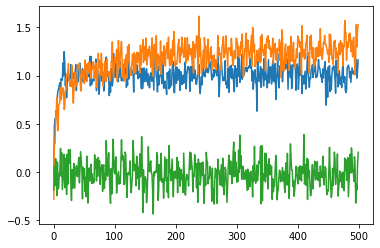

In [6]:
fig, ax = plot_average_rewards(grewards)
fig, ax = plot_average_rewards(erewards, ax)
fig, ax = plot_average_rewards(rrewards, ax)

In [7]:
gchoices = np.array([b.choice_history for b in gbandits])
echoices = np.array([b.choice_history for b in ebandits])
rchoices = np.array([b.choice_history for b in rbandits])

(0.0, 1.0)

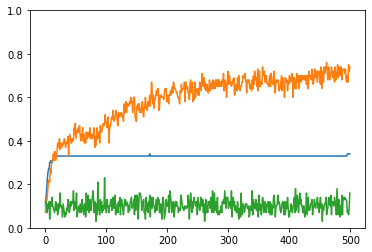

In [8]:
plt.plot(np.mean(gchoices == best_choices[:, np.newaxis], axis=0))
plt.plot(np.mean(echoices == best_choices[:, np.newaxis], axis=0))
plt.plot(np.mean(rchoices == best_choices[:, np.newaxis], axis=0))
plt.ylim(0, 1)